I intend to evaluate the hypothesis that having foreign-born players on a team leads to better FIFA rankings in men’s football. I found two data sources: the first is a list of FIFA rankings from 1992-2019, the second is a list of foreign-born players who have played in FIFA world cups from 1930 until 2018.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# WRANGLING THE FIRST DATAFRAME:

In [4]:
df1 = pd.read_csv('fifa_ranking-2019-12-19.csv')

df1.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43935,1,Belgium,BEL,1765,10706050,0,UEFA,2019-12-19
1,43946,2,France,FRA,1733,10703030,0,UEFA,2019-12-19
2,43924,3,Brazil,BRA,1712,10701020,0,CONMEBOL,2019-12-19
3,43942,4,England,ENG,1661,10606010,0,UEFA,2019-12-19
4,43930,5,Uruguay,URU,1645,10604050,0,CONMEBOL,2019-12-19


In [5]:
df1.tail()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
60749,43825,161,Lebanon,LBN,0,0,0,AFC,1992-12-31
60750,43895,162,Bahamas,BAH,0,0,0,CONCACAF,1992-12-31
60751,43828,163,Maldives,MDV,0,0,0,AFC,1992-12-31
60752,43877,163,Rwanda,RWA,0,0,0,CAF,1992-12-31
60753,43882,163,Somalia,SOM,0,0,0,CAF,1992-12-31


In [6]:
df1.columns

Index(['id', 'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')

The 'id' column contains the country id given by FIFA to its members. The 'confederation' column contains the name of the regional body which organizes continental national competitions.

In [7]:
df1.shape

(60754, 9)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60754 entries, 0 to 60753
Data columns (total 9 columns):
id                 60754 non-null int64
rank               60754 non-null int64
country_full       60754 non-null object
country_abrv       60754 non-null object
total_points       60754 non-null int64
previous_points    60754 non-null int64
rank_change        60754 non-null int64
confederation      60754 non-null object
rank_date          60754 non-null object
dtypes: int64(5), object(4)
memory usage: 4.2+ MB


In [9]:
#Removing duplicates to try and minimize the size of the final dataframe (reduced by almost 2000 rows)
df1 = df1.drop_duplicates()
df1

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43935,1,Belgium,BEL,1765,10706050,0,UEFA,2019-12-19
1,43946,2,France,FRA,1733,10703030,0,UEFA,2019-12-19
2,43924,3,Brazil,BRA,1712,10701020,0,CONMEBOL,2019-12-19
3,43942,4,England,ENG,1661,10606010,0,UEFA,2019-12-19
4,43930,5,Uruguay,URU,1645,10604050,0,CONMEBOL,2019-12-19
...,...,...,...,...,...,...,...,...,...
60749,43825,161,Lebanon,LBN,0,0,0,AFC,1992-12-31
60750,43895,162,Bahamas,BAH,0,0,0,CONCACAF,1992-12-31
60751,43828,163,Maldives,MDV,0,0,0,AFC,1992-12-31
60752,43877,163,Rwanda,RWA,0,0,0,CAF,1992-12-31


In [10]:
df1 = df1[['country_full', 'rank', 'total_points', 'rank_date']]
df1.head()

,country_full,rank,total_points,rank_date
0,Belgium,1,1765,2019-12-19
1,France,2,1733,2019-12-19
2,Brazil,3,1712,2019-12-19
3,England,4,1661,2019-12-19
4,Uruguay,5,1645,2019-12-19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2401f610>,
      dtype=object)

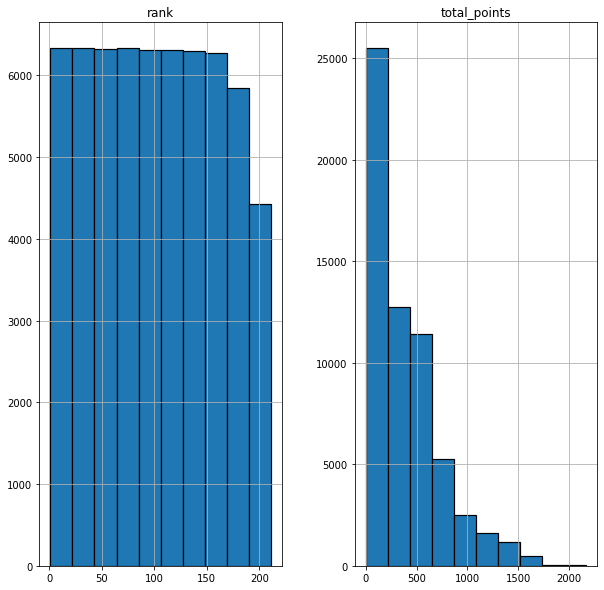

In [11]:
df1.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10))

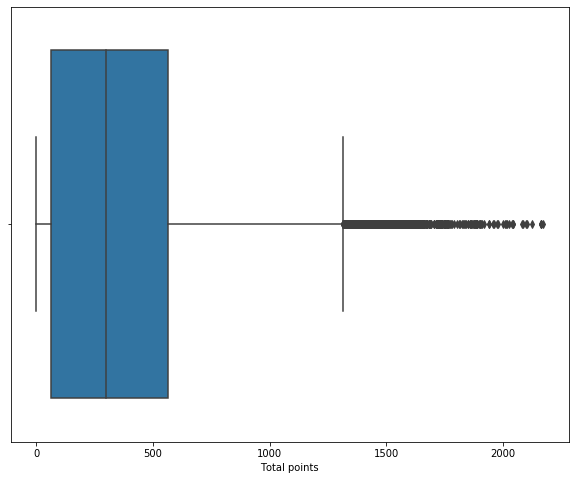

In [12]:
# The total points column above has outlier around 2000 points. This is better seen below:
plt.figure(figsize=(10,8))
_ = sns.boxplot(x = 'total_points', data = df1)
_ = plt.xlabel('Total points')


In [13]:
df1[df1['total_points'] >= 1800].head()

,country_full,rank,total_points,rank_date
2739,Germany,1,2172,2018-07-01
2740,France,2,2164,2018-07-01
2741,Portugal,3,2163,2018-07-01
2742,Brazil,4,2160,2018-07-01
2743,Belgium,5,2124,2018-07-01


# INTERESTING FINDING: POINTS BUMP DURING TOURNAMENT YEARS?
There seems to be extreme values (around 1800 points) in the 'total_points' column. After inspecting the “total_points” column, I realized that the total points in 2018 were higher than in all other years (including 2019) which is a bit counterintuitive. This might be because that year was when the world cup was held so maybe there’s a points bump for countries that participate in the tournament. 

In [14]:
#Renaming 'country-full' column to 'country'
df1['country'] = df1['country_full']

#Renaming 'rank-date' column to 'date', in preparation for merge with df1
df1['date'] = df1['rank_date']
df1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,country_full,rank,total_points,rank_date,country,date
0,Belgium,1,1765,2019-12-19,Belgium,2019-12-19
1,France,2,1733,2019-12-19,France,2019-12-19
2,Brazil,3,1712,2019-12-19,Brazil,2019-12-19
3,England,4,1661,2019-12-19,England,2019-12-19
4,Uruguay,5,1645,2019-12-19,Uruguay,2019-12-19


# CHOOSING DF1 COLUMNS TO FOCUS ON
The 'total_points' column serves a similar purpose as the 'rank' column which doesn't have the outliers. I decided to keep the 'rank' column to show a country's improvement in place of the 'total_points column. I also decided to include the 'date' column to complete tracking of improvement and the 'country' column.

In [15]:
df1 = df1[['rank', 'date', 'country']]
df1.head()

,rank,date,country
0,1,2019-12-19,Belgium
1,2,2019-12-19,France
2,3,2019-12-19,Brazil
3,4,2019-12-19,England
4,5,2019-12-19,Uruguay


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 3 columns):
rank       60754 non-null int64
date       60754 non-null object
country    60754 non-null object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


# WRANGLING THE SECOND DATAFRAME

In [17]:
df2 = pd.read_csv('MigrantsWorldCup1930-2018.csv')
df2  = df2.drop_duplicates()
df2.head()

,Name Football Player,International,Date of birth,Place of birth,Country of birth,Nationality Father,Nationality Mother,Nationality Grandfather,Nationality Grandmother,Foreign-born,Contextual-Nationality,FIFA World Cup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,5 May 1905,Avellaneda,Argentina,NaN,NaN,NaN,NaN,0,0,1930
1,Juan Botasso,Argentina,23 October 1905,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,23 Ferbruary 1907,Barracas,Argentina,NaN,NaN,NaN,NaN,0,0,1930
3,Alberto Chividini,Argentina,23 February 1907,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,19 March 1909,Buenos Aires,Argentina,Argentina,Argentina,NaN,NaN,0,0,1930


In [18]:
df2.columns

Index(['Name Football Player', 'International ', 'Date of birth',
       'Place of birth ', 'Country of birth', 'Nationality Father',
       'Nationality Mother', 'Nationality Grandfather',
       'Nationality Grandmother', 'Foreign-born', 'Contextual-Nationality',
       'FIFA World Cup'],
      dtype='object')

# REMOVING WHITESPACE IN COLUMN NAMES
The "International" column in df2 has a space at the end of the name which is not conducive to slicing so I eliminated all whitespace from the names of the columns.

In [19]:
df2.columns = [c.replace(' ', '') for c in df2.columns]
df2.columns

Index(['NameFootballPlayer', 'International', 'Dateofbirth', 'Placeofbirth',
       'Countryofbirth', 'NationalityFather', 'NationalityMother',
       'NationalityGrandfather', 'NationalityGrandmother', 'Foreign-born',
       'Contextual-Nationality', 'FIFAWorldCup'],
      dtype='object')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 12 columns):
NameFootballPlayer        10129 non-null object
International             10129 non-null object
Dateofbirth               10129 non-null object
Placeofbirth              10129 non-null object
Countryofbirth            10129 non-null object
NationalityFather         1190 non-null object
NationalityMother         1129 non-null object
NationalityGrandfather    175 non-null object
NationalityGrandmother    129 non-null object
Foreign-born              10129 non-null int64
Contextual-Nationality    10129 non-null int64
FIFAWorldCup              10129 non-null int64
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


# CHOOSING DF2 COLUMNS TO FOCUS ON: 
I decided to focus on these columns for my final analysis: 'NameFootballPlayer', 'International', 'Foreign-born', 'FIFAWorldCup'. The first one gives us the name of the football player while the second column indicates which country they played for in the World Cup. The 'FIFAWorldCup' column indicates which year the player participated in the World Cup. The 'Foreign-born' column indicates whether or not the player was born in the country they played for (0) or not (1) so I transformed it into a Boolean type column.

In preparation for a merge with DF1 I renamed the 'International' column to 'country' and the 'FIFAWorldCup' column to 'date'.

In [21]:
cols = ['NameFootballPlayer', 'International','Foreign-born', 'FIFAWorldCup' ]
df2 = df2[cols]
df2.head()

,NameFootballPlayer,International,Foreign-born,FIFAWorldCup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0,1930
1,Juan Botasso,Argentina,0,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0,1930
3,Alberto Chividini,Argentina,0,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0,1930


In [22]:
#Renaming 'International' column to 'country'
df2['country'] = df2['International']
df2.head()

,NameFootballPlayer,International,Foreign-born,FIFAWorldCup,country
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0,1930,Argentina
1,Juan Botasso,Argentina,0,1930,Argentina
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0,1930,Argentina
3,Alberto Chividini,Argentina,0,1930,Argentina
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0,1930,Argentina


In [23]:
df2 = df2[['NameFootballPlayer', 'Foreign-born', 'FIFAWorldCup', 'country']]
df2.head()

,NameFootballPlayer,Foreign-born,FIFAWorldCup,country
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,0,1930,Argentina
1,Juan Botasso,0,1930,Argentina
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",0,1930,Argentina
3,Alberto Chividini,0,1930,Argentina
4,"Attilio José Demaria (""Attilio Demaria"")",0,1930,Argentina


In [24]:
#Renaming 'FIFAWorldCup' column to 'date' in preparation for merge
df2['date'] = df2['FIFAWorldCup']

df2 = df2[['NameFootballPlayer', 'Foreign-born', 'country', 'date']]
df2.head()

,NameFootballPlayer,Foreign-born,country,date
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,0,Argentina,1930
1,Juan Botasso,0,Argentina,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",0,Argentina,1930
3,Alberto Chividini,0,Argentina,1930
4,"Attilio José Demaria (""Attilio Demaria"")",0,Argentina,1930


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 4 columns):
NameFootballPlayer    10129 non-null object
Foreign-born          10129 non-null int64
country               10129 non-null object
date                  10129 non-null int64
dtypes: int64(2), object(2)
memory usage: 395.7+ KB


In [26]:
#inner join df1 and df2
data_merged = pd.merge(df1, df2, how = 'inner', on ='country')
data_merged = data_merged.drop('date_x', axis = 1)
data_merged.head()

,rank,country,NameFootballPlayer,Foreign-born,date_y
0,1,Belgium,Ferdinand Eloy Adams,0,1930
1,1,Belgium,"Arnold ""Nolle"" Badjou",0,1930
2,1,Belgium,Pierre E. E. Braine (Captain),0,1930
3,1,Belgium,Joseph Dieudonné Alexis Chantraine (Alexis Cha...,0,1930
4,1,Belgium,Jean Baptiste De Bie,0,1930


In [27]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593005 entries, 0 to 2593004
Data columns (total 5 columns):
rank                  int64
country               object
NameFootballPlayer    object
Foreign-born          int64
date_y                int64
dtypes: int64(3), object(2)
memory usage: 118.7+ MB


The ranking system currently being deployed by FIFA wasn't instituted until December 1992. Since our DataFrame is unwieldy, we will focus on rankings from 1993 onwards.

In [28]:
new_df = data_merged.loc[data_merged['date_y'] >= 1993]
new_df.head()


,rank,country,NameFootballPlayer,Foreign-born,date_y
170,1,Belgium,Michel Preud'homme,0,1994
171,1,Belgium,Dirk Medved,0,1994
172,1,Belgium,Vital Borkelmans,0,1994
173,1,Belgium,Philippe Albert,0,1994
174,1,Belgium,Rudi Smidts,0,1994


In [30]:
#Save dataframe in order to use in EDA and ML notebooks
new_df.to_csv('wrangled-dataframe')
